### 如何用Python做舆情时间序列可视化？ - 简书
 https://www.jianshu.com/p/4ea083874df4

### 1. loading data.

In [1]:
import pandas as pd
df = pd.read_excel("restaurant-comments.xlsx")

df.head()

,comments,date
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00


In [2]:
# text of first line

first_line_text = df.comments.iloc[0]
print(first_line_text)

这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩啊！！新出的红皮土豆也好好吃，还有炸酥肉，秒杀任何火锅店啊！服务员太可爱，告诉我们半份豆花是4块儿，一份豆花是6块儿，点两个半份比较合适，太实在了哈哈哈，每次妈妈说开心果好吃服务员都给我们打包带走??希望A餐厅早日出咖喱锅，期待ing……


### 2. transforming data: adding sentiment score as a row.

In [3]:
from snownlp import SnowNLP

analyzed_first_line = SnowNLP(first_line_text)

print(analyzed_first_line)

In [4]:
type(analyzed_first_line)

snownlp.SnowNLP

In [5]:
analyzed_first_line.sentiments

0.4244401030222834

In [6]:
# create a function 
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments


In [7]:
# column manipulation 
# apply the function on the texts, to get the score
# store the scores in the new column.

df["sentiment"] = df.comments.apply(get_sentiment_cn)

In [8]:

df.head()

,comments,date,sentiment
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,0.424440
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,0.450691
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.000000
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,0.118200
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00,0.871226


In [9]:
df.sentiment.describe()

count    2.700000e+01
mean     6.987503e-01
std      4.008801e-01
min      6.334066e-08
25%      4.375657e-01
50%      9.270364e-01
75%      9.999909e-01
max      1.000000e+00
Name: sentiment, dtype: float64

### 3. visualization.

In [10]:

# %pylab is a magic function in ipython.
# Magic functions in pylab always begin with the percent sign (%) followed without any spaces by a small text string;
#  in essence, ipython magic functions define shortcuts particularly useful for interactive work
# User doug - Stack Overflow https://stackoverflow.com/users/66549/doug

%pylab inline

from ggplot import *


Populating the interactive namespace from numpy and matplotlib


/home/hanl9/anaconda3/envs/py36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


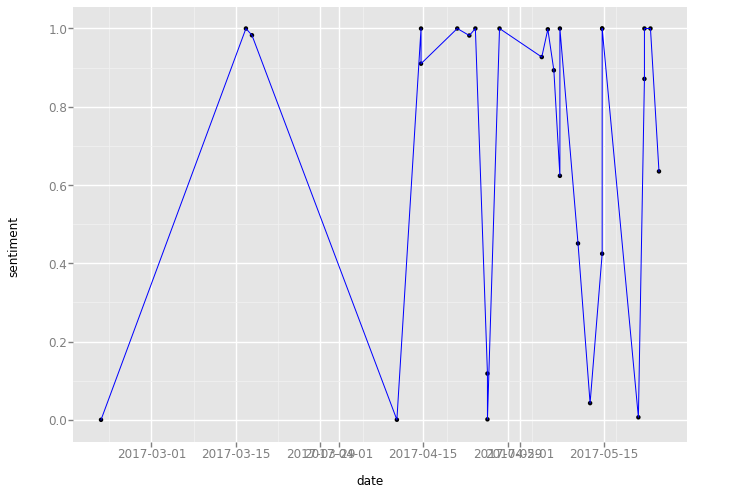

<ggplot: (8772092689016)>

In [11]:
ggplot(aes(x="date", y="sentiment"), data=df) + geom_point() + geom_line(color = 'blue') + scale_x_date(labels = date_format("%Y-%m-%d"))


In [12]:
# df.sort_values(['sentiment'])[0]

sorted_small_to_large = df.sort_values('sentiment', ascending=1)

print(sorted_small_to_large)

                                             comments                date  \
24  这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人... 2017-02-20 16:00:00   
10  服务好赞！外送小哥实际A餐厅自己配的，送之前一个电话说别急已经在送的路上，送到后也一个电话说... 2017-04-10 16:00:00   
15  话说我真的很久很久没有吃A餐厅了，朋友想吃，我俩就过来了。她喜欢番茄锅，所以我们点了牛油麻辣... 2017-04-25 16:00:00   
7   A餐厅真的是天津每一个店我都来过无数次了！<br>今天觉得我拍的图很好看hhhh于是就来发条... 2017-05-20 16:00:00   
8   今天又来到新开路的A餐厅，食材还是非常新鲜，羔羊肉味道鲜美，墨鱼滑味道新鲜！我们一家三口吃的... 2017-05-12 16:00:00   
3   A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚... 2017-04-25 16:00:00   
0   这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩... 2017-05-14 16:00:00   
1   第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然... 2017-05-10 16:00:00   
9   服务态度一如既往的好，看我东西多，主动帮忙提东西，所有的服务员都主动打招呼，非常热情。我点的... 2017-05-07 16:00:00   
26                                  家门口经常去服务没的说环境也挺好的 2017-05-24 01:50:00   
4   因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的... 2017-05-21 16:00:00   
18  再次来享受A餐厅的服务，真是好，等位的时候可以下棋等餐，而且有美甲做，需要排队很久，柠檬水不... 2017-05-06 16:00:00   

In [13]:
sorted_small_to_large = df.sort_values('sentiment')

print(sorted_small_to_large)

                                             comments                date  \
24  这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人... 2017-02-20 16:00:00   
10  服务好赞！外送小哥实际A餐厅自己配的，送之前一个电话说别急已经在送的路上，送到后也一个电话说... 2017-04-10 16:00:00   
15  话说我真的很久很久没有吃A餐厅了，朋友想吃，我俩就过来了。她喜欢番茄锅，所以我们点了牛油麻辣... 2017-04-25 16:00:00   
7   A餐厅真的是天津每一个店我都来过无数次了！<br>今天觉得我拍的图很好看hhhh于是就来发条... 2017-05-20 16:00:00   
8   今天又来到新开路的A餐厅，食材还是非常新鲜，羔羊肉味道鲜美，墨鱼滑味道新鲜！我们一家三口吃的... 2017-05-12 16:00:00   
3   A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚... 2017-04-25 16:00:00   
0   这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩... 2017-05-14 16:00:00   
1   第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然... 2017-05-10 16:00:00   
9   服务态度一如既往的好，看我东西多，主动帮忙提东西，所有的服务员都主动打招呼，非常热情。我点的... 2017-05-07 16:00:00   
26                                  家门口经常去服务没的说环境也挺好的 2017-05-24 01:50:00   
4   因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的... 2017-05-21 16:00:00   
18  再次来享受A餐厅的服务，真是好，等位的时候可以下棋等餐，而且有美甲做，需要排队很久，柠檬水不... 2017-05-06 16:00:00   

In [27]:
# default is ascending = 1, means small to large , 
# [:1] is the first row
df.sort_values(['sentiment'])[:1]

,comments,date,sentiment
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,6.334066e-08


In [28]:
df.sort_values(['sentiment'])[0:1]

,comments,date,sentiment
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,6.334066e-08


In [34]:
# [-1] is the last one
df.sort_values(['sentiment']).iloc[-1]

comments     大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...
date                                       2017-04-20 16:00:00
sentiment                                                    1
Name: 2, dtype: object

In [35]:
# from first to second to last. 
df.sort_values(['sentiment'])[:-1]

,comments,date,sentiment
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,6.334066e-08
10,服务好赞！外送小哥实际A餐厅自己配的，送之前一个电话说别急已经在送的路上，送到后也一个电话说...,2017-04-10 16:00:00,1.965386e-04
15,话说我真的很久很久没有吃A餐厅了，朋友想吃，我俩就过来了。她喜欢番茄锅，所以我们点了牛油麻辣...,2017-04-25 16:00:00,1.215408e-03
7,A餐厅真的是天津每一个店我都来过无数次了！<br>今天觉得我拍的图很好看hhhh于是就来发条...,2017-05-20 16:00:00,6.392747e-03
8,今天又来到新开路的A餐厅，食材还是非常新鲜，羔羊肉味道鲜美，墨鱼滑味道新鲜！我们一家三口吃的...,2017-05-12 16:00:00,4.267672e-02
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,1.182003e-01
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,4.244401e-01
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,4.506914e-01
9,服务态度一如既往的好，看我东西多，主动帮忙提东西，所有的服务员都主动打招呼，非常热情。我点的...,2017-05-07 16:00:00,6.235047e-01
26,家门口经常去服务没的说环境也挺好的,2017-05-24 01:50:00,6.348401e-01


In [30]:
# set ascending=0 , large to small , [:1] is the first row

df.sort_values('sentiment', ascending=0)[:1]


,comments,date,sentiment
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.0


In [22]:
# From second row to the last

df.sort_values('sentiment', ascending=0)[1:]

,comments,date,sentiment
20,A餐厅的服务一直很好，光顾很多次了，这次去是小伙伴们帮忙预定，为我庆生，A餐厅的工作人员还提...,2017-05-21 16:00:00,1.000000e+00
16,提前预订的因为孩子生日孩子们又喜欢那的口味服务我就不都说了一如既往的优质每位服务员态度都是那...,2017-04-27 16:00:00,1.000000e+00
12,一直特别特别特别爱A餐厅真的服务太贴心了细节决定一切呀用餐的时候接了个电话无意中跟朋友说今天...,2017-05-07 16:00:00,9.999998e-01
11,服务一如既往的这么赞、论食材是火锅中的精粹，论服务也绝对是龙头老大！人多最爱来吃A餐厅了、每...,2017-04-23 16:00:00,9.999997e-01
25,一直喜欢A餐厅，去过其他店，这次陪父母来他家体验。排队等待时服务员很贴心的送来小吃，很温馨。...,2017-05-22 16:00:00,9.999988e-01
23,A餐厅火锅<br>上周五带对象去吃的，我本人对火锅不是特别爱吃，吃不了辣，对象喜欢吃辣的，就...,2017-03-16 16:00:00,9.999957e-01
14,口味还不错?点了一份蛋炒饭，加荷包蛋?溏心的。捞派捞面?还不错，菌汤番茄?的都好吃。炸馒头一...,2017-05-14 16:00:00,9.999862e-01
13,服务没的说啊，非常的周到啊，从始至终不用自己喊服务员，主动的倒饮料，帮我们下肉，吃完还给我们...,2017-05-14 16:00:00,9.999515e-01
19,服务和味道一如既往的好，主要最爱吃他家DIY的小料！这次还用手机扫了个公众平台用一楼的照片打...,2017-04-14 16:00:00,9.998846e-01
5,A餐厅是我们的定点单位，单位大聚小聚都来这，所以享受VIP待遇，来了不用等位。这的菜品新鲜，...,2017-05-05 16:00:00,9.980202e-01


In [31]:
# form the first row to the last. 
df.sort_values('sentiment', ascending=0)[0:]

,comments,date,sentiment
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.000000e+00
20,A餐厅的服务一直很好，光顾很多次了，这次去是小伙伴们帮忙预定，为我庆生，A餐厅的工作人员还提...,2017-05-21 16:00:00,1.000000e+00
16,提前预订的因为孩子生日孩子们又喜欢那的口味服务我就不都说了一如既往的优质每位服务员态度都是那...,2017-04-27 16:00:00,1.000000e+00
12,一直特别特别特别爱A餐厅真的服务太贴心了细节决定一切呀用餐的时候接了个电话无意中跟朋友说今天...,2017-05-07 16:00:00,9.999998e-01
11,服务一如既往的这么赞、论食材是火锅中的精粹，论服务也绝对是龙头老大！人多最爱来吃A餐厅了、每...,2017-04-23 16:00:00,9.999997e-01
25,一直喜欢A餐厅，去过其他店，这次陪父母来他家体验。排队等待时服务员很贴心的送来小吃，很温馨。...,2017-05-22 16:00:00,9.999988e-01
23,A餐厅火锅<br>上周五带对象去吃的，我本人对火锅不是特别爱吃，吃不了辣，对象喜欢吃辣的，就...,2017-03-16 16:00:00,9.999957e-01
14,口味还不错?点了一份蛋炒饭，加荷包蛋?溏心的。捞派捞面?还不错，菌汤番茄?的都好吃。炸馒头一...,2017-05-14 16:00:00,9.999862e-01
13,服务没的说啊，非常的周到啊，从始至终不用自己喊服务员，主动的倒饮料，帮我们下肉，吃完还给我们...,2017-05-14 16:00:00,9.999515e-01
19,服务和味道一如既往的好，主要最爱吃他家DIY的小料！这次还用手机扫了个公众平台用一楼的照片打...,2017-04-14 16:00:00,9.998846e-01


In [ ]:
df.sort_values(['sentiment']).iloc[0].comments

,comments,date,sentiment
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,6.334066e-08
10,服务好赞！外送小哥实际A餐厅自己配的，送之前一个电话说别急已经在送的路上，送到后也一个电话说...,2017-04-10 16:00:00,1.965386e-04
15,话说我真的很久很久没有吃A餐厅了，朋友想吃，我俩就过来了。她喜欢番茄锅，所以我们点了牛油麻辣...,2017-04-25 16:00:00,1.215408e-03
7,A餐厅真的是天津每一个店我都来过无数次了！<br>今天觉得我拍的图很好看hhhh于是就来发条...,2017-05-20 16:00:00,6.392747e-03
8,今天又来到新开路的A餐厅，食材还是非常新鲜，羔羊肉味道鲜美，墨鱼滑味道新鲜！我们一家三口吃的...,2017-05-12 16:00:00,4.267672e-02
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,1.182003e-01
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,4.244401e-01
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,4.506914e-01
9,服务态度一如既往的好，看我东西多，主动帮忙提东西，所有的服务员都主动打招呼，非常热情。我点的...,2017-05-07 16:00:00,6.235047e-01
26,家门口经常去服务没的说环境也挺好的,2017-05-24 01:50:00,6.348401e-01


comments     大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...
date                                       2017-04-20 16:00:00
sentiment                                                    1
Name: 2, dtype: object